In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

In [39]:
df = pd.read_csv('attrition.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 300 non-null    int64 
 1   gender              300 non-null    object
 2   education           300 non-null    object
 3   department          300 non-null    object
 4   job_role            300 non-null    object
 5   monthly_income      300 non-null    int64 
 6   years_at_company    300 non-null    int64 
 7   promotions          300 non-null    int64 
 8   overtime            300 non-null    object
 9   performance_rating  300 non-null    int64 
 10  attrition           300 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 25.9+ KB


# NO NULL VALUES IN THE DATASET

In [41]:
# checking for Duplicate rows
df.duplicated().sum()

np.int64(0)

# 0 Duplicate Rows as Well )

In [42]:
df.head()

,age,gender,education,department,job_role,monthly_income,years_at_company,promotions,overtime,performance_rating,attrition
0,50,Female,Post-Graduate,IT,Lead,102565,9,0,No,1,0
1,36,Female,PhD,Sales,Lead,49402,2,0,Yes,2,0
2,29,Female,Graduate,HR,Executive,24263,7,1,No,1,0
3,42,Male,Graduate,HR,Executive,116523,7,3,Yes,4,0
4,40,Female,PhD,HR,Manager,66828,1,1,Yes,3,0


Let's Perform EDA on the DATASET.

Text(0, 0.5, 'Count')

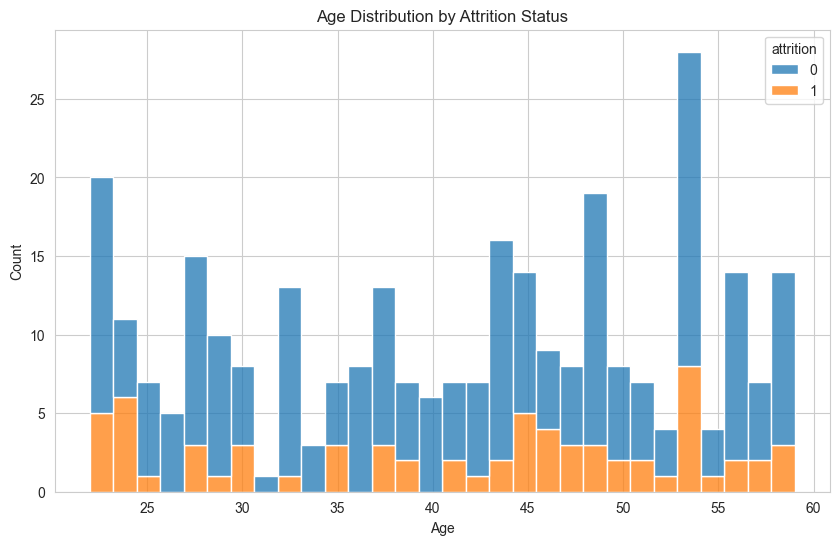

In [43]:
# Find the connection between Age and Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='attrition', multiple='stack', bins=30)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count')

C:\Users\Nani\AppData\Local\Temp\ipykernel_15440\3299093761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attrition', data=df, palette='coolwarm')


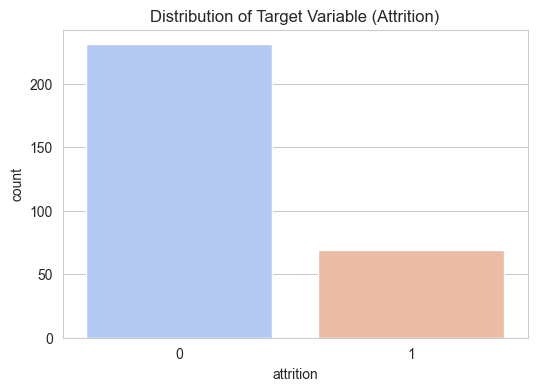

attrition
0    0.77
1    0.23
Name: proportion, dtype: float64


In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='attrition', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (Attrition)')
plt.show()

# Print exact numbers
print(df['attrition'].value_counts(normalize=True))

# WE have Imbalance Data. 
## Out of total 300 Employes

## 231 - Stayed 
## 69 - Left 

Lets check How the Categoery Columns Affect the Attrition

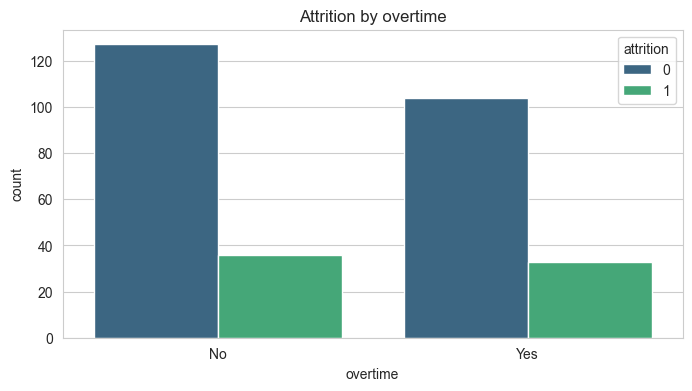

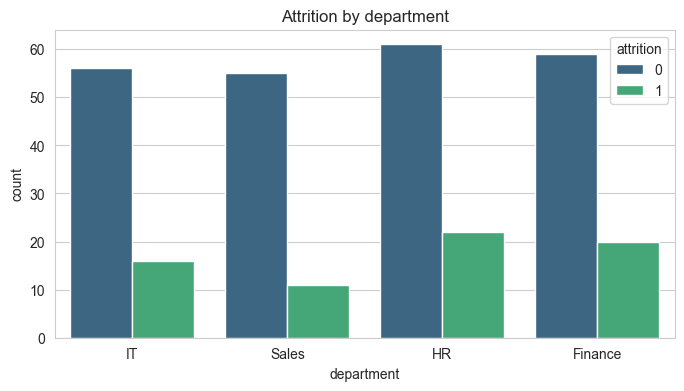

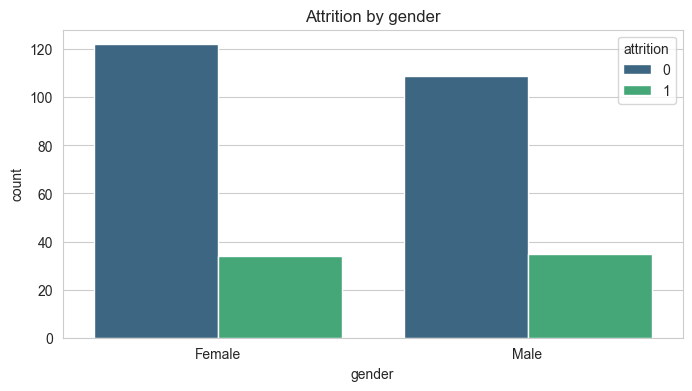

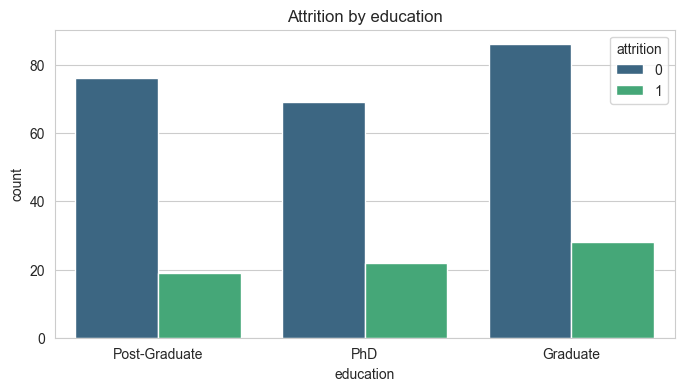

In [45]:
cols = ['overtime', 'department', 'gender', 'education']

for col in cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='attrition', data=df, palette='viridis')
    plt.title(f'Attrition by {col}')
    plt.show()

Unable to Find out much but HR Team leaves the most where as SALES team had the least Attrition's

Lets Compare the Income and the Attrition

C:\Users\Nani\AppData\Local\Temp\ipykernel_15440\2308784846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y='monthly_income', data=df, palette='Set2')


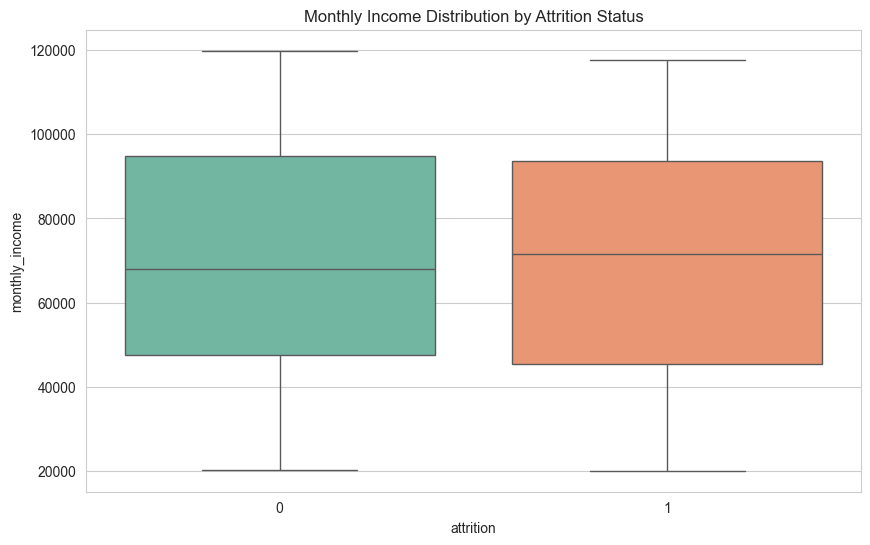

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='monthly_income', data=df, palette='Set2')
plt.title('Monthly Income Distribution by Attrition Status')
plt.show()

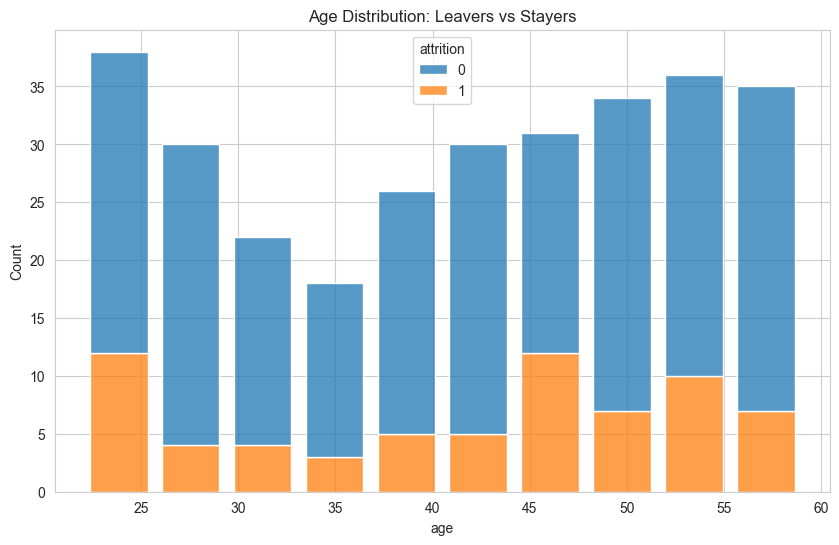

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df, hue='attrition', multiple="stack", shrink=0.8)
plt.title('Age Distribution: Leavers vs Stayers')
plt.show()

Can't Find much people around 35 Years of AGE are less likely to leave as well as they are the least no of employes in the company so NOPE.

# Designing the HeatMap it should give correlation between features

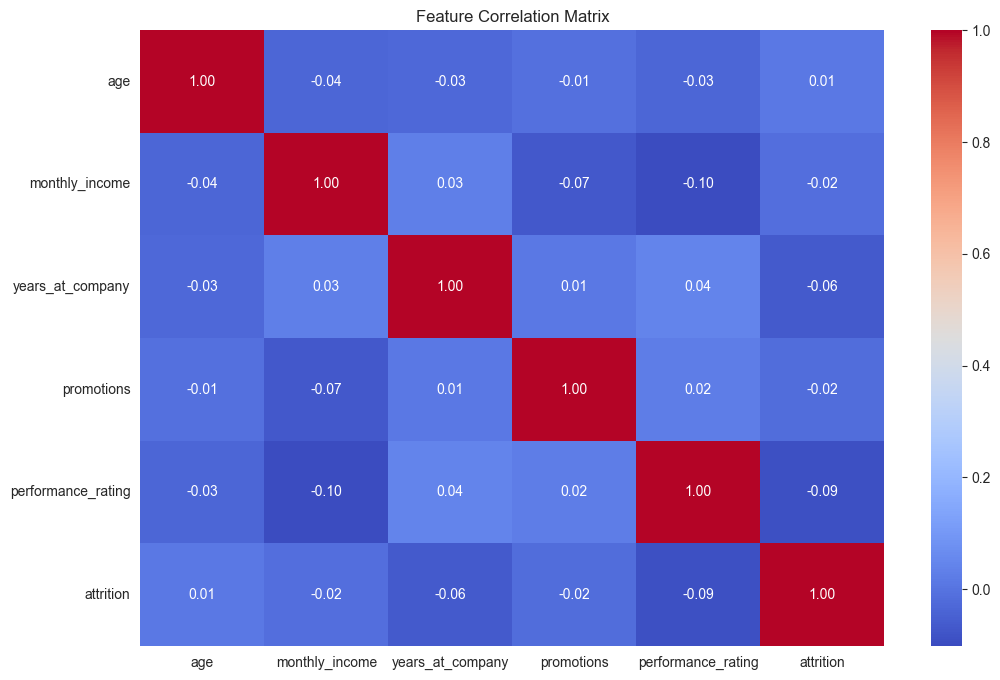

In [48]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

LETS start Training the model.

so I was thinking about using 2 Models Intially and Two Ways of Training them 

1 : Logistic Regression 

    a : Train Normally with Balanced Weights (class '1' will have more Weightage)
    b : apply SMOTE on the DATASET as we have dataset which has only '69' - 1's in the Attrition Column

2 : RandomForest 
why randomforest ?? 
I is an Ensembeling model, which is sure to Produce good Results compared a Single Model

    a : Train Normally with Provided Dataset
    b : Apply SMOTE and add synthetic data then train and TEST

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop('attrition', axis=1)
y = df['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [50]:
# Just checking the value counts in y_train and y_test
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
attrition
0    163
1     47
Name: count, dtype: int64

Test set class distribution:
attrition
0    68
1    22
Name: count, dtype: int64


In [51]:
# Creating the column Transformer and Pipeline for preprocessing and modeling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE

In [52]:
X.head()

,age,gender,education,department,job_role,monthly_income,years_at_company,promotions,overtime,performance_rating
0,50,Female,Post-Graduate,IT,Lead,102565,9,0,No,1
1,36,Female,PhD,Sales,Lead,49402,2,0,Yes,2
2,29,Female,Graduate,HR,Executive,24263,7,1,No,1
3,42,Male,Graduate,HR,Executive,116523,7,3,Yes,4
4,40,Female,PhD,HR,Manager,66828,1,1,Yes,3


In [53]:
df['job_role'].unique()

array(['Lead', 'Executive', 'Manager'], dtype=object)

In [54]:
#ORDINAL ENCODING ORDER

education_order = ['Post-Graduate', 'Graduate', 'PhD']

job_order = ['Executive', 'Manager', 'Lead']



## The departent Column has no connection between the Values inside the Column itself so we are going with OneHotEncoder 

## I am Normalizing every other Numerical column using Standard scalar which will get all their mean to 0 and SD to 1 

## The values will now be Colser to 0 and range between 2 to -2 at most probobaly if greater than that might be an Outliner

EDUCATION and JOB_ROLE they have a ORDER like the values inside that Column are Greater than Each Other 

Education : 'Post-Graduate' < 'Graduate' < 'PhD'

Job_role  : 'Executive' < 'Manager' < 'Lead'

In [55]:
Transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['department', 'gender', 'overtime']),
    ('ordinal', OrdinalEncoder(categories=[education_order, job_order]), ['education', 'job_role']),
    ('scaler', StandardScaler(), ['age', 'monthly_income', 'years_at_company'])
])

In [56]:
# Create SMOTE dataset
smote = SMOTE(random_state=42)

## SMOTE ONLY ACCEPTS NUMERICAL DATA, so lets transform X_train first
X_train_transformed = Transformer.fit_transform(X_train)


X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

## NOW LETS Create PIPELINES for LogisticRegression First

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [58]:
logi_pipe = Pipeline(steps=[
    ('preprocessor', Transformer),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

In [59]:
logi_model = logi_pipe.fit(X_train, y_train)
y_pred = logi_model.predict(X_test)


In [60]:
logi_smote_model = LogisticRegression(class_weight='balanced', random_state=42)
logi_smote_model.fit(X_train_res, y_train_res)
y_smote_pred = logi_smote_model.predict(Transformer.transform(X_test))

Predicting Accuracy , Precision , Recall and Confusion Matrix as well

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [62]:
# Accuracy and classification report for both models
print("Logistic Regression without SMOTE:")
print("accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression without SMOTE:
accuracy: 0.5111111111111111
Precision: 0.19444444444444445
Recall: 0.3181818181818182
F1 Score: 0.2413793103448276
              precision    recall  f1-score   support

           0       0.72      0.57      0.64        68
           1       0.19      0.32      0.24        22

    accuracy                           0.51        90
   macro avg       0.46      0.45      0.44        90
weighted avg       0.59      0.51      0.54        90

roc_auc_score: 0.445855614973262
Confusion Matrix:
[[39 29]
 [15  7]]


In [63]:
print("Logistic Regression with SMOTE:")
print("accuracy:", accuracy_score(y_test, y_smote_pred))
print("Precision:", precision_score(y_test, y_smote_pred))
print("Recall:", recall_score(y_test, y_smote_pred))
print("F1 Score:", f1_score(y_test, y_smote_pred))
print(classification_report(y_test, y_smote_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_smote_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_smote_pred))

Logistic Regression with SMOTE:
accuracy: 0.5777777777777777
Precision: 0.2777777777777778
Recall: 0.45454545454545453
F1 Score: 0.3448275862068966
              precision    recall  f1-score   support

           0       0.78      0.62      0.69        68
           1       0.28      0.45      0.34        22

    accuracy                           0.58        90
   macro avg       0.53      0.54      0.52        90
weighted avg       0.66      0.58      0.60        90

roc_auc_score: 0.536096256684492
Confusion Matrix:
[[42 26]
 [12 10]]


### As we can see the scores are not that Good lets go and try Ensemble Methods

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rand_pipe = Pipeline(steps=[
    ('preprocessor', Transformer),
    ('classifier', RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42))
])

In [66]:
rand_model = rand_pipe.fit(X_train, y_train)
y_rand_pred = rand_model.predict(X_test)

In [67]:
rand_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
rand_smote_model.fit(X_train_res, y_train_res)
y_rand_smote_pred = rand_smote_model.predict(Transformer.transform(X_test))

In [68]:
print("RandomForest without SMOTE:")
print("accuracy:", accuracy_score(y_test, y_rand_pred))
print("Precision:", precision_score(y_test, y_rand_pred))
print("Recall:", recall_score(y_test, y_rand_pred))
print("F1 Score:", f1_score(y_test, y_rand_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_rand_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rand_pred))

RandomForest without SMOTE:
accuracy: 0.7666666666666667
Precision: 1.0
Recall: 0.045454545454545456
F1 Score: 0.08695652173913043
roc_auc_score: 0.5227272727272727
Confusion Matrix:
[[68  0]
 [21  1]]


In [69]:
print("RandomForest with SMOTE:")
print("accuracy:", accuracy_score(y_test, y_rand_smote_pred))
print("Precision:", precision_score(y_test, y_rand_smote_pred))
print("Recall:", recall_score(y_test, y_rand_smote_pred))
print("F1 Score:", f1_score(y_test, y_rand_smote_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_rand_smote_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rand_smote_pred))

RandomForest with SMOTE:
accuracy: 0.7333333333333333
Precision: 0.25
Recall: 0.045454545454545456
F1 Score: 0.07692307692307693
roc_auc_score: 0.500668449197861
Confusion Matrix:
[[65  3]
 [21  1]]


### SO even though random Forest is an ensembling method it performed worse compared to LogisticRegression 

## So the best model overall is LogisticResression with Smote Gives an Accuracy : 57%

In [70]:
coefficients = logi_smote_model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

top_drivers = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

print(top_drivers[['Feature', 'Coefficient']])

              Feature  Coefficient
3          department     0.432970
1              gender     0.379733
0                 age     0.298801
9  performance_rating    -0.177622
8            overtime    -0.140308
7          promotions    -0.093721
5      monthly_income     0.040884
4            job_role    -0.028705
2           education     0.019614
6    years_at_company    -0.003573


C:\Users\Nani\AppData\Local\Temp\ipykernel_15440\4060917459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


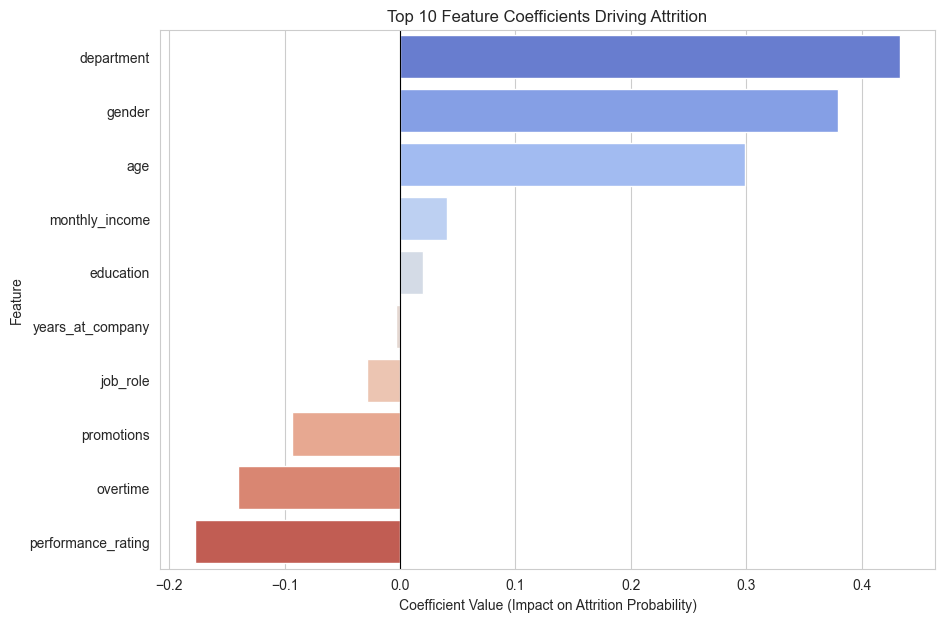

In [71]:
plt.figure(figsize=(10, 7))
# Use the actual coefficient value for the bar plot to show POSITIVE/NEGATIVE impact
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=top_drivers.sort_values(by='Coefficient', ascending=False), # Sort by value for better visual flow
    palette="coolwarm"
)
plt.title('Top 10 Feature Coefficients Driving Attrition')
plt.axvline(0, color='black', linewidth=0.8) # Draw a line at zero for separation
plt.xlabel('Coefficient Value (Impact on Attrition Probability)')
plt.ylabel('Feature')
plt.show()

In [72]:
# LETS SAVE THE MODEL using pickle

import pickle
with open('logistic_smote_model.pkl', 'wb') as f:
    pickle.dump(logi_smote_model, f)

In [73]:
# Dump the transformer as well

with open('transformer.pkl', 'wb') as f:
    pickle.dump(Transformer, f)